In [2]:
from func.ultis import decompress_pickle, load_obj
import matplotlib.pyplot as plt

from func.run_pipeline_super_vox import reassign
import numpy as np
from func.plot_utils import colorful_seg, fill_noise

import napari

In [3]:
test_file_names = [
    "N_294_final_crop_ds2",
    "N_435_final_crop_ds2",
    "N_441_final_crop_ds2",
    "N_511_final_crop_ds2",
    "N_522_final_crop_ds2",
    "N_590_final_crop_ds2",
    "N_593_final_crop_ds2"
]

seg_final_eg_gcn_list = []
seg_final_retrained_list = []
seg_final_gasp_list = []
hand_seg_list = []

for i, test_file in enumerate(test_file_names):
    print(f"test file number: {i}")
    seg_final_eg_gcn = decompress_pickle(f"../../masterthesis_results/ovules_results/edge_gated/{test_file}.npz_seg_final.pbz2")
    seg_final_eg_gcn = fill_noise(seg_final_eg_gcn)
    seg_final_eg_gcn_colorful = colorful_seg(seg_final_eg_gcn)

    seg_final_eg_gcn_list.append(seg_final_eg_gcn_colorful)

    seg_final_retrained = decompress_pickle(f"../../masterthesis_results/ovules_results/retrained/{test_file}.npz_seg_final.pbz2")
    seg_final_retrained_colorful = colorful_seg(seg_final_retrained)

    seg_final_retrained_list.append(seg_final_retrained_colorful)

    seg_final_gasp = decompress_pickle(f"../../masterthesis_results/ovules_results/gasp/{test_file}.npz_seg_final.pbz2")
    seg_final_gasp_colorful = colorful_seg(seg_final_gasp.astype(np.int32))

    seg_final_gasp_list.append(seg_final_gasp_colorful)

    hf = np.load(f"../data/CellSeg_dataset/Ovules_processed_thin_boundary_edge/test/{test_file}.npz")
    hand_seg = np.array(hf["ins"], dtype=np.float)

    hand_seg_list.append(hand_seg)

test file number: 0
052102376599634370.053016453382084090.053930530164533820.0548446069469835440.0557586837294332740.0566727605118830.057586837294332730.058500914076782450.059414990859232170.06032906764168190.0612431444241316250.0621572212065813550.063071297989031080.063985374771480810.064899451553930520.065813528336380250.066727605118829980.067641681901279710.068555758683729430.069469835466179160.070383912248628890.07129798903107860.072212065813528330.073126142595978060.07404021937842780.074954296160877510.075868372943327240.076782449725776970.077696526508226680.078610603290676410.079524680073126140.080438756855575870.081352833638025590.082266910420475320.083180987202925050.084095063985374770.08500914076782450.085923217550274230.086837294332723950.087751371115173670.08866544789762340.089579524680073130.090493601462522850.091407678244972580.09232175502742230.093235831809872040.094149908592321750.095063985374771480.095978062157221210.096892138939670930.097806215722120660.098720292504570

/var/folders/qq/9q6wphrj19z8xt4qcffm8df80000gn/T/ipykernel_21914/2427143152.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hand_seg = np.array(hf["ins"], dtype=np.float)


test file number: 1
0514665190924183740.052573325954620920.053680132816823460.054786939679026010.0558937465412285560.05700055340343110.0581073602656336440.059214167127836190.060320973990038740.0614277808522412860.062534587714443830.063641394576646370.064748201438848920.065855008301051470.066961815163254020.068068622025456560.069175428887659110.070282235749861640.071389042612064190.072495849474266740.073602656336469290.074709463198671830.075816270060874380.076923076923076930.078029883785279470.079136690647482010.080243497509684560.08135030437188710.082457111234089650.08356391809629220.084670724958494740.085777531820697290.086884338682899840.087991145545102370.089097952407304920.090204759269507470.091311566131710010.092418372993912560.093525179856115110.094631986718317660.09573879358052020.096845600442722750.097952407304925280.099059214167127830.100166021029330380.101272827891532930.102379634753735470.103486441615938020.104593248478140570.105700055340343120.106806862202545650.10791366906

In [5]:
seg_final_gasp_list[0].shape

(160, 480, 500, 3)

IndexError: index 70 is out of bounds for axis 0 with size 70

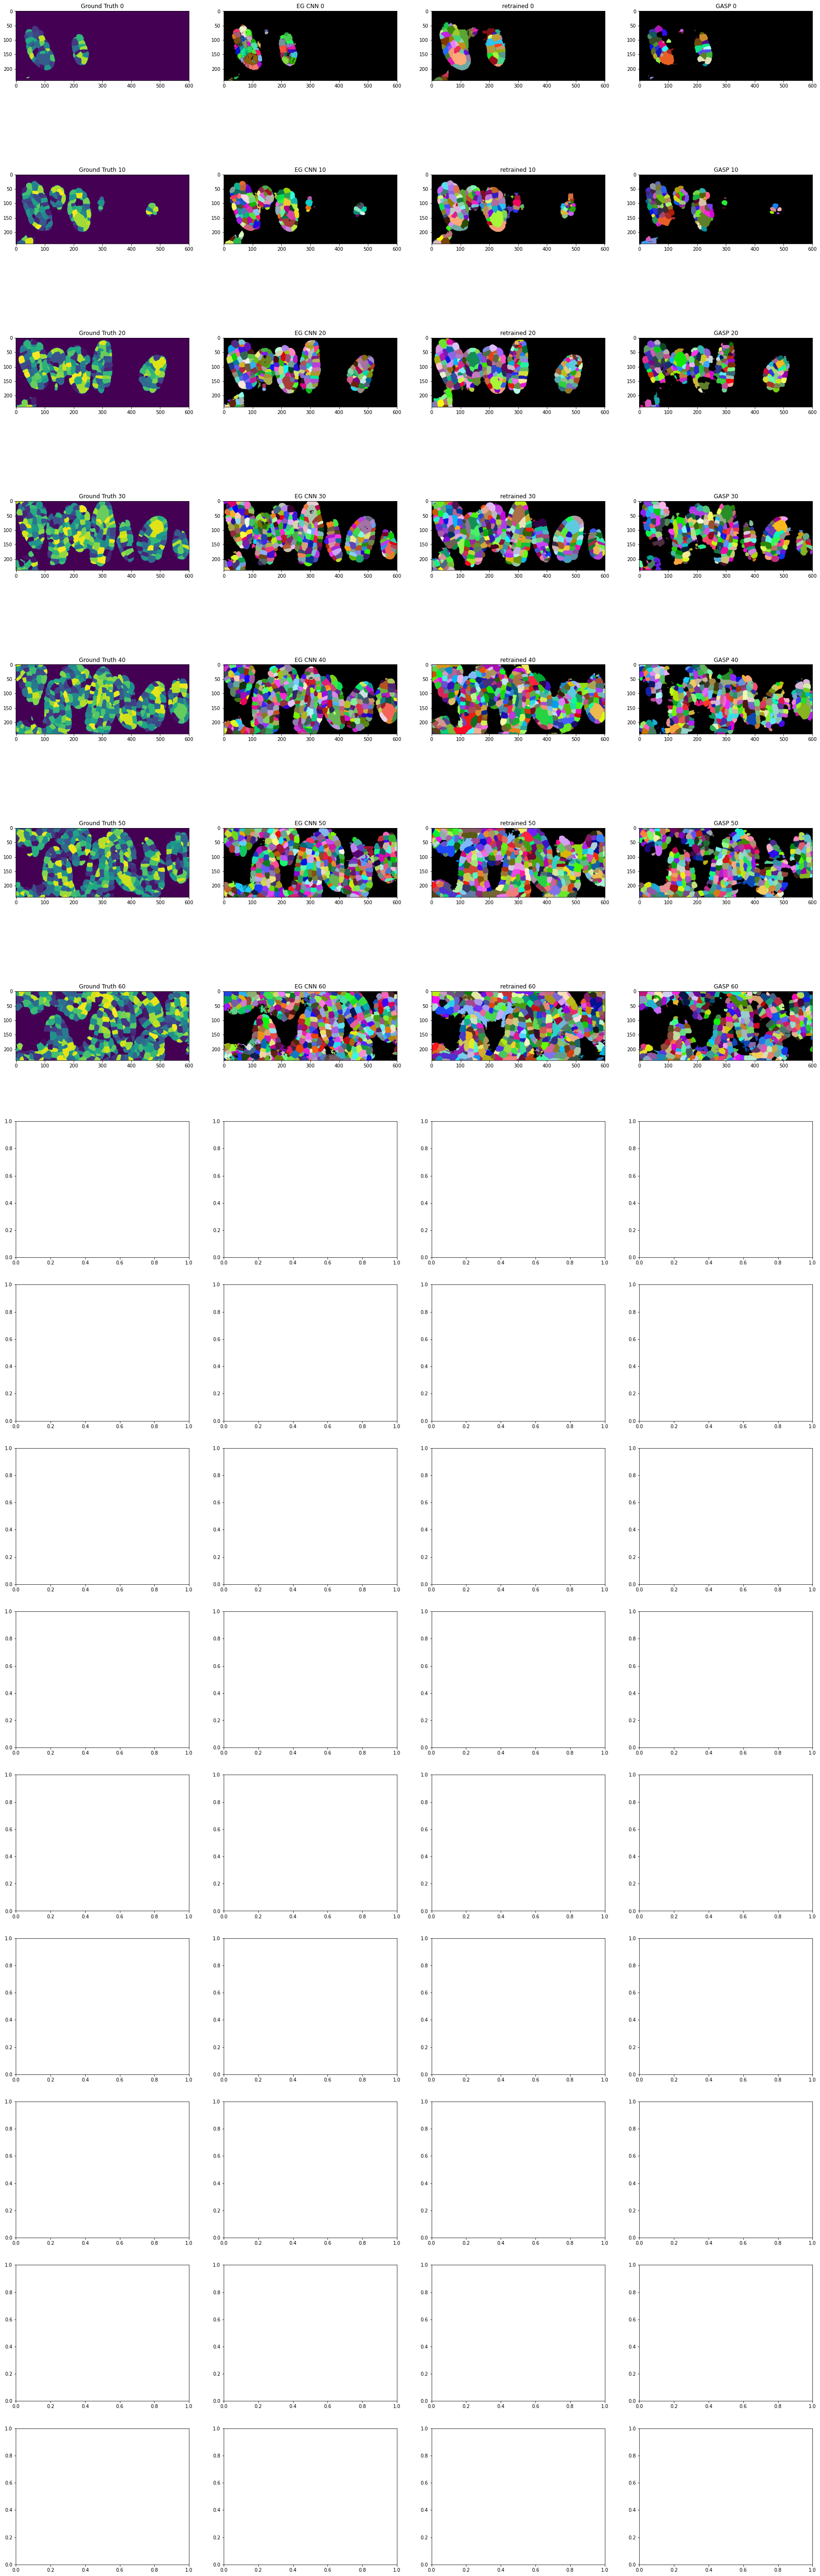

In [45]:
picture_index = 6
fig, axes = plt.subplots(16, 4, figsize=(30, 100))
for index, a in enumerate(axes):
    shown_index = index * 10
    a[0].imshow(hand_seg_list[picture_index][shown_index, ...])
    a[1].imshow(seg_final_eg_gcn_list[picture_index][shown_index, ...])
    a[2].imshow(seg_final_retrained_list[picture_index][shown_index, ...])
    a[3].imshow(seg_final_gasp_list[picture_index][index*10, ...])

    a[0].set_title(f'Ground Truth {shown_index}')
    a[1].set_title(f'EG CNN {shown_index}')
    a[2].set_title(f'retrained {shown_index}')
    a[3].set_title(f'GASP {shown_index}')

# create plots for thesis

In [18]:
hand_seg_colorful_4 = colorful_seg(hand_seg_list[4])

.0083798882681564240.01117318435754190.0139664804469273730.016759776536312850.0195530726256983240.02234636871508380.0251396648044692750.0279329608938547470.0307262569832402220.03351955307262570.0363128491620111770.039106145251396650.041899441340782120.04469273743016760.047486033519553070.050279329608938550.053072625698324020.0558659217877094940.058659217877094970.0614525139664804450.064245810055865920.066108007448789570.068901303538175040.071694599627560520.0744878957169460.077281191806331470.080074487895716940.082867783985102420.08566108007448790.088454376163873370.091247672253258850.094040968342644320.096834264432029790.099627560521415280.102420856610800750.105214152700186220.108007448789571690.110800744878957160.113594040968342650.116387337057728120.11918063314711360.121973929236499070.124767225325884540.127560521415270020.13035381750465550.133147113594040970.135009310986964610.13780260707635010.139664804469273730.141527001862197380.143389199255121030.146182495344506530.148975791433

In [19]:
hf = np.load(f"../data/CellSeg_dataset/Ovules_processed_thin_boundary_edge/test/N_522_final_crop_ds2.npz")
raw_img_4 = np.array(hf["raw"], dtype=np.float)

/var/folders/qq/9q6wphrj19z8xt4qcffm8df80000gn/T/ipykernel_21914/3259298000.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_img_4 = np.array(hf["raw"], dtype=np.float)


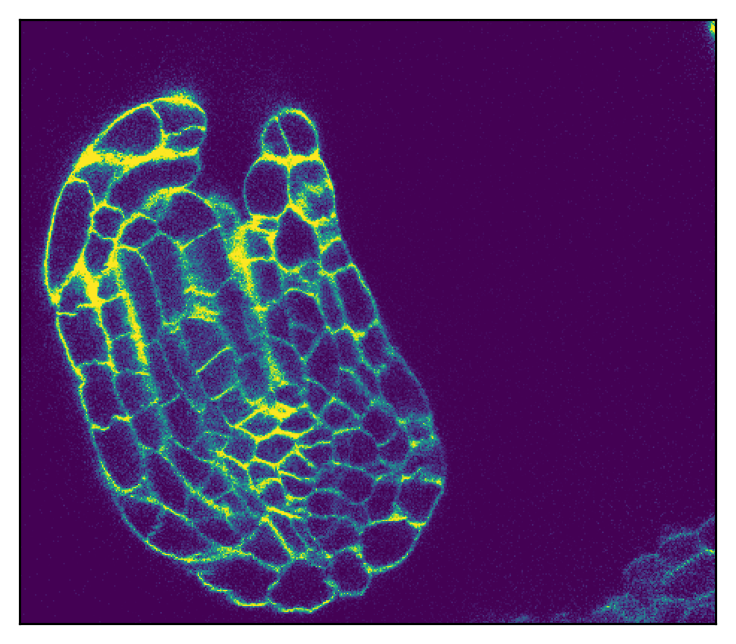

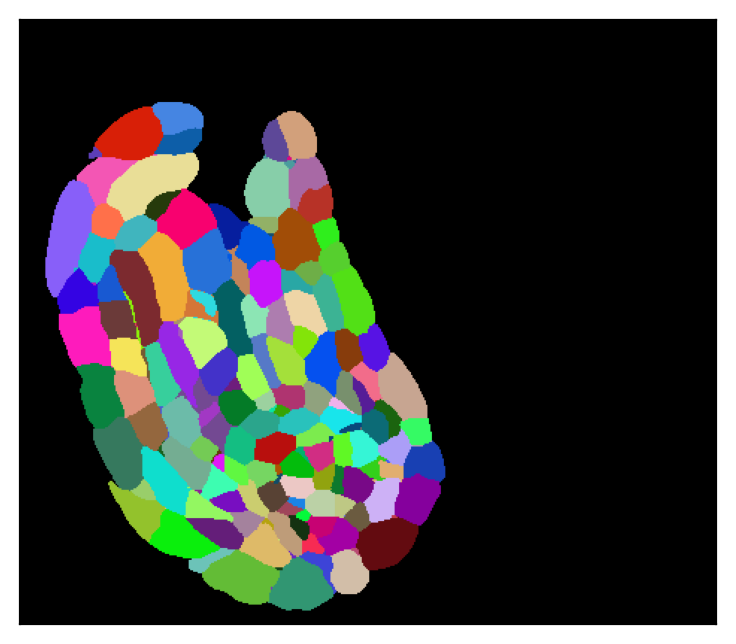

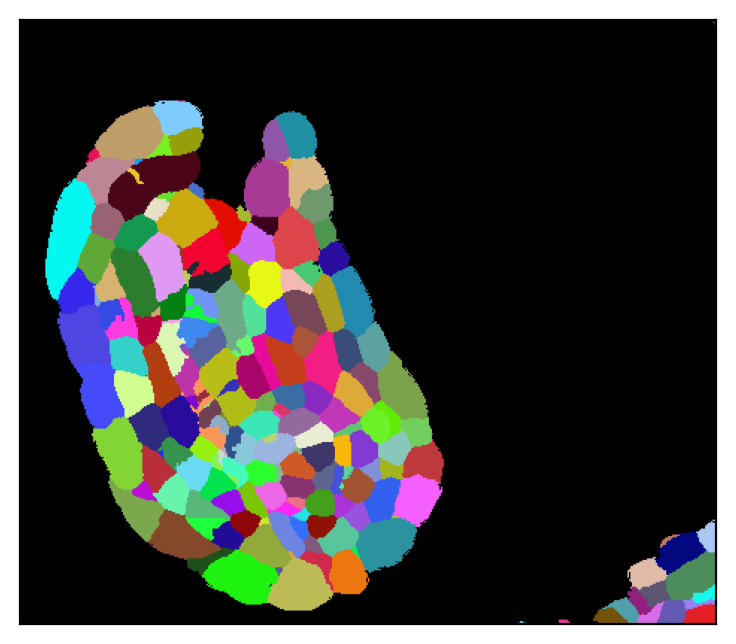

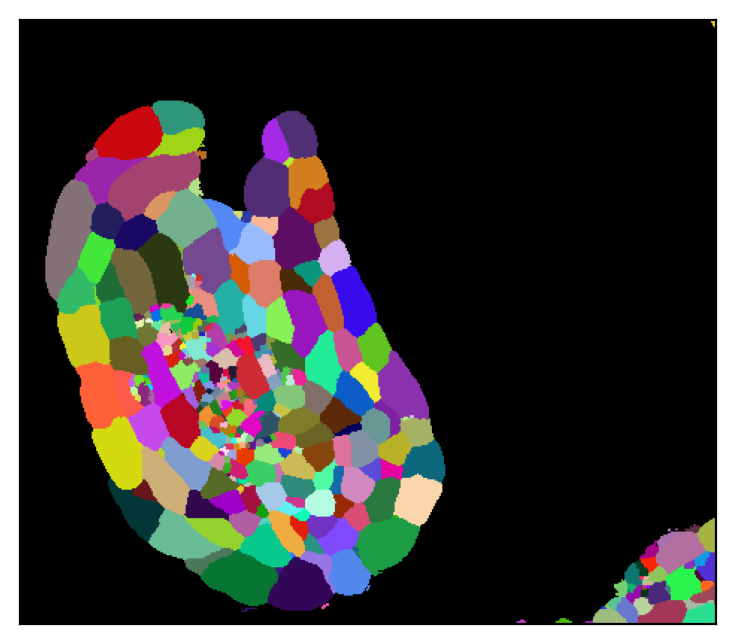

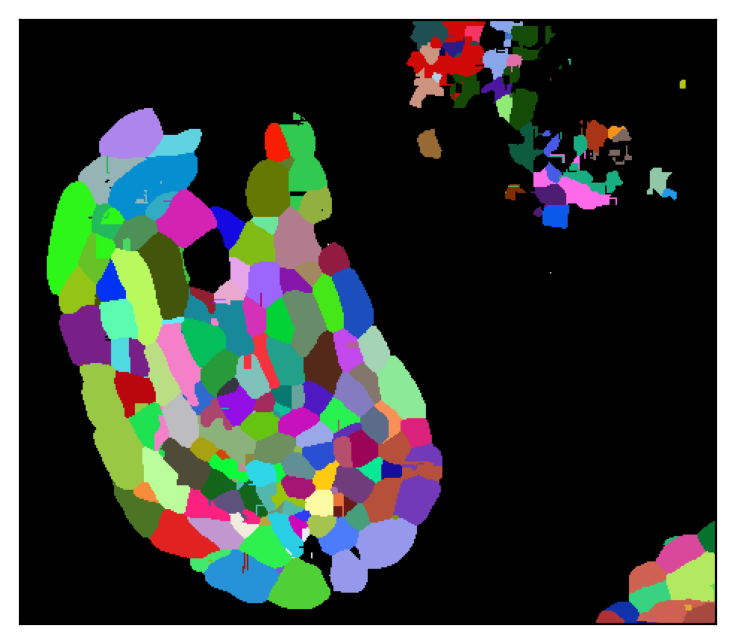

In [43]:
N=90
picture_number = 4

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(raw_img_4[N, ...])
plt.savefig("outputs/raw_img_ovules_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(hand_seg_colorful_4[N, ...])
plt.savefig("outputs/handseg_ovules_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_eg_gcn_list[picture_number][N, ...])
plt.savefig("outputs/final_seg_eg_gcn_ovules_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_retrained_list[picture_number][N, ...])
plt.savefig("outputs/final_retrained_ovules_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_gasp_list[picture_number][N, ...])
plt.savefig("outputs/final_seg_gasp_ovules_1.pdf", bbox_inches='tight')

In [41]:
hand_seg_colorful_5 = colorful_seg(hand_seg_list[5])
hf = np.load(f"../data/CellSeg_dataset/Ovules_processed_thin_boundary_edge/test/N_590_final_crop_ds2.npz")
raw_img_5 = np.array(hf["raw"], dtype=np.float)

/var/folders/qq/9q6wphrj19z8xt4qcffm8df80000gn/T/ipykernel_21914/436074625.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_img_5 = np.array(hf["raw"], dtype=np.float)


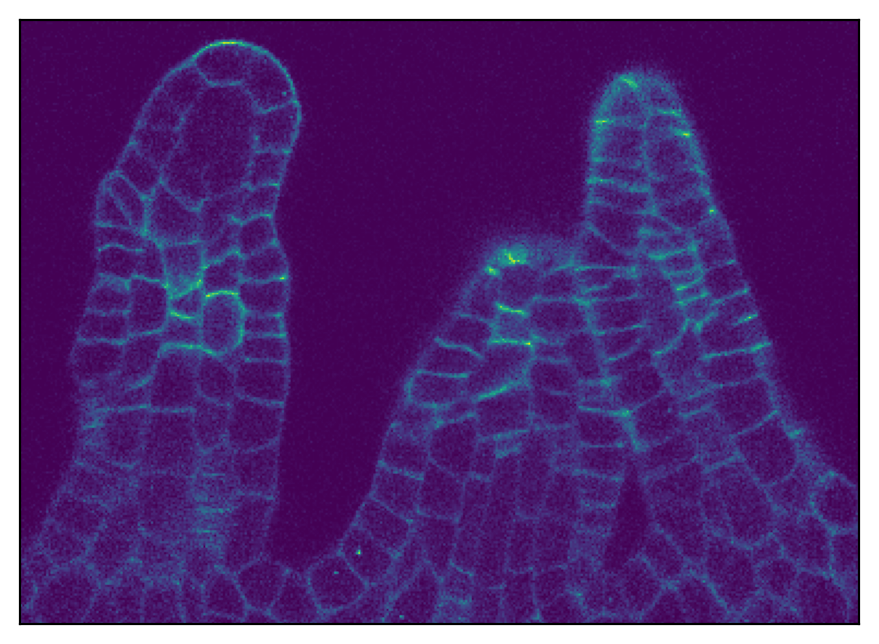

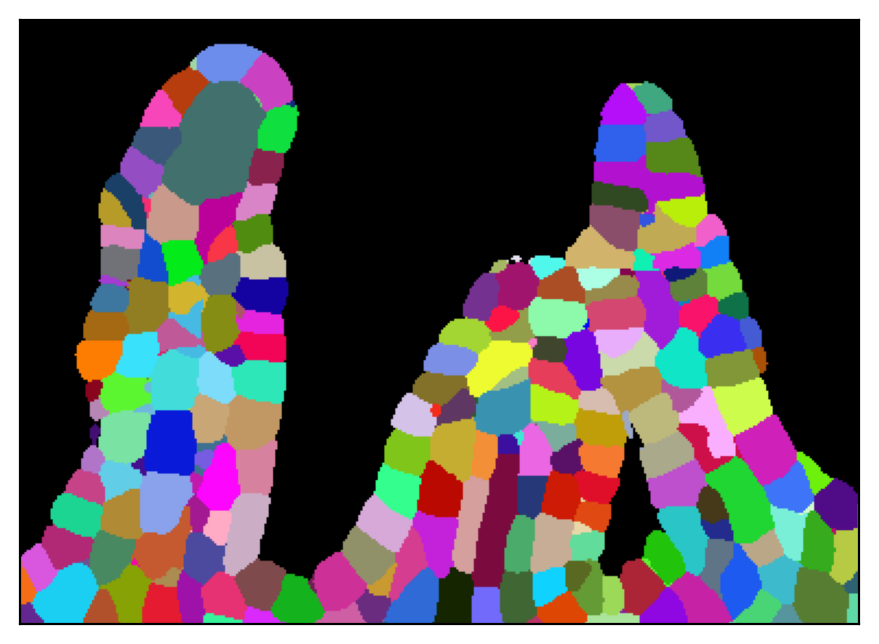

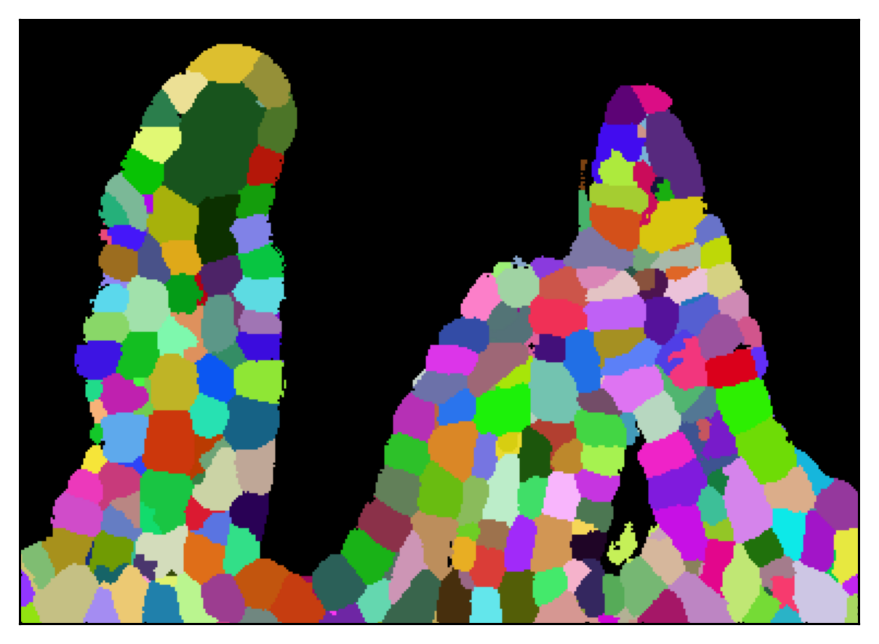

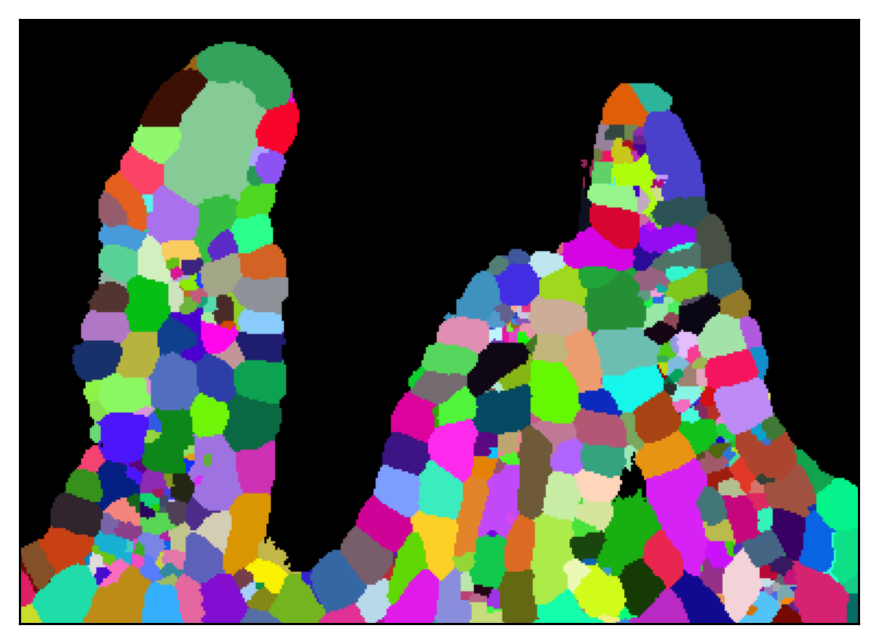

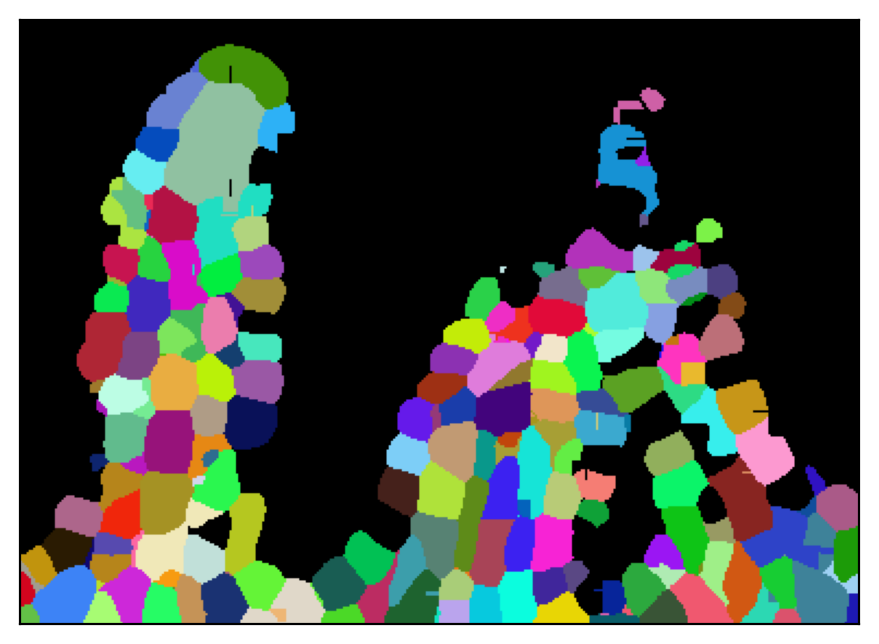

In [44]:
N=40
picture_number = 5

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(raw_img_5[N, ...])
plt.savefig("outputs/raw_img_ovules_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(hand_seg_colorful_5[N, ...])
plt.savefig("outputs/handseg_ovules_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_eg_gcn_list[picture_number][N, ...])
plt.savefig("outputs/final_seg_eg_gcn_ovules_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_retrained_list[picture_number][N, ...])
plt.savefig("outputs/final_retrained_ovules_2.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_gasp_list[picture_number][N, ...])
plt.savefig("outputs/final_seg_gasp_ovules_2.pdf", bbox_inches='tight')

In [65]:
import napari

# TODO fill noise anwenden!!!
seg_final_eg_gcn_3d_1 = decompress_pickle(f"../../masterthesis_results/ovules_results/edge_gated/N_522_final_crop_ds2.npz_seg_final.pbz2")

# viewer = napari.Viewer()

blobs = seg_final_eg_gcn_3d_1# data.binary_blobs(length=128, volume_fraction=0.1, n_dim=3)
viewer = napari.view_image(blobs.astype(float), name='blobs_eg')
labeled = seg_final_eg_gcn_3d_1
viewer.add_labels(labeled, name='blob ID EG')

ZeroDivisionError: float division by zero

In [62]:
seg_final_retrained_3d_1 = decompress_pickle(f"../../masterthesis_results/ovules_results/retrained/N_522_final_crop_ds2.npz_seg_final.pbz2")

viewer_2 = napari.Viewer()

blobs = seg_final_retrained_3d_1# data.binary_blobs(length=128, volume_fraction=0.1, n_dim=3)
viewer_2 = napari.view_image(blobs.astype(float), name='blobs_retrained')
labeled = seg_final_retrained_3d_1
viewer_2.add_labels(labeled, name='blob ID RETRAINED')

ZeroDivisionError: float division by zero